In [1]:
from keras.models import Model, Sequential
from keras.layers import Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Flatten, Dense, Dropout, Activation
from PIL import Image
import numpy as np
from keras.applications.imagenet_utils import preprocess_input
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.preprocessing.image import save_img

Using TensorFlow backend.


### VGG 16 layer

In [2]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(4096, (7, 7), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(4096, (1, 1), activation='relu'))
model.add(Dropout(0.5))
model.add(Convolution2D(2622, (1, 1)))
model.add(Flatten())
model.add(Activation('softmax'))

### Weight for VGG 16 layer model

In [3]:
from keras.models import model_from_json
model.load_weights('./vgg_face_weights.h5')

#### Function for processing image

In [4]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img = img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

#### Values for comparing images (Cosine Similarity, EuclideanDistance)

In [5]:
def findCosineSimilarity(source_representation, test_representation):
    a = np.matmul(np.transpose(source_representation), test_representation)
    b = np.sum(np.multiply(source_representation, source_representation))
    c = np.sum(np.multiply(test_representation, test_representation))
    return 1 - (a / (np.sqrt(b) * np.sqrt(c)))

def findEuclideanDistance(source_representation, test_representation):
    euclidean_distance = source_representation - test_representation
    euclidean_distance = np.sum(np.multiply(euclidean_distance, euclidean_distance))
    euclidean_distance = np.sqrt(euclidean_distance)
    return euclidean_distance

### Step for making Model

In [6]:
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Comparing Image(Original vs Modified)

In [7]:
epsilon = 0.30

def verifyFace(img1, img2):
    img1_representation = vgg_face_descriptor.predict(preprocess_image('./train/%s' % (img1)))[0,:]
    img2_representation = vgg_face_descriptor.predict(preprocess_image('./train/%s' % (img2)))[0,:]
    
    cosine_similarity = findCosineSimilarity(img1_representation, img2_representation)
    euclidean_distance = findEuclideanDistance(img1_representation, img2_representation)
    
    print("similarity: ", cosine_similarity)
    print("Euclidean distance: ",euclidean_distance)
    
    if(cosine_similarity < epsilon):
        print("verified... they are same person")
    else:
        print("unverified! they are not same person!")
    
    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(image.load_img('./train/%s' % (img1)))
    plt.xticks([]); plt.yticks([])
    f.add_subplot(1,2, 2)
    plt.imshow(image.load_img('./train/%s' % (img2)))
    plt.xticks([]); plt.yticks([])
    plt.show(block=True)
    print("-----------------------------------------")

### Modified Image with using Histogram Equalization.  

#### Top Image will be Original Image, and the below will be Modified Image

similarity:  0.250028014183
Euclidean distance:  68.4717
verified... they are same person


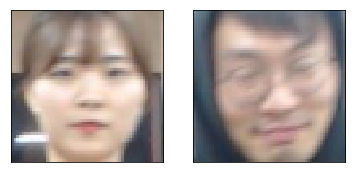

-----------------------------------------


In [8]:
verifyFace("lhn.jpg", "hjm.jpg")

similarity:  0.303520977497
Euclidean distance:  80.9242
unverified! they are not same person!


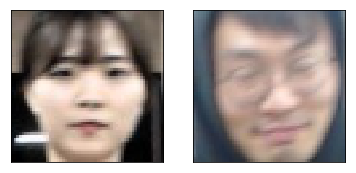

-----------------------------------------


In [9]:
verifyFace("lhn_m.jpg", "hjm.jpg")

similarity:  0.13491755724
Euclidean distance:  62.4713
verified... they are same person


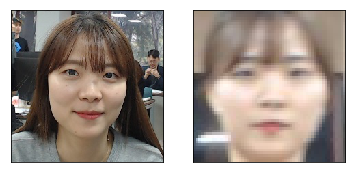

-----------------------------------------


In [10]:
verifyFace("hannim.jpg", "lhn.jpg")

similarity:  0.189361214638
Euclidean distance:  73.2963
verified... they are same person


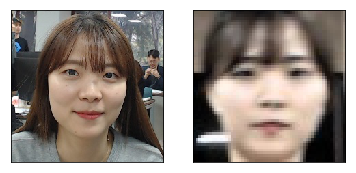

-----------------------------------------


In [11]:
verifyFace("hannim.jpg", "lhn_m.jpg")

In [12]:
verifyFace("3.jpg", "0.jpg")

FileNotFoundError: [Errno 2] No such file or directory: './train/3.jpg'

In [ ]:
verifyFace("3.jpg", "1423.jpg")

Before Histogram Equalization

In [ ]:
verifyFace("jihoon.jpg", "jjh.jpg")

After Histogram Equalization

In [ ]:
verifyFace("jihoon.jpg", "jjh_m.jpg")verifyFace("jihoon_.jpg", "jjh.jpg")

Before Histogram Equalization

In [ ]:
verifyFace("lsh.jpg", "seoho_.jpg")

After Histogram Equalization

In [ ]:
verifyFace("lsh_m.jpg", "seoho_.jpg")